Loading packages to be used later.

In [1]:
import sqlite3
import pandas as pd
import numpy as np
from collections import Counter
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

Connecting to the SQLITE file and putting it in a data frame.

In [2]:
conn = sqlite3.connect('wildfires.sqlite')

fires = pd.read_sql_query("""
SELECT *
FROM fires 
LIMIT 10000
""", conn)

In [3]:
fires.head()

,OBJECTID,FOD_ID,FPA_ID,SOURCE_SYSTEM_TYPE,SOURCE_SYSTEM,NWCG_REPORTING_AGENCY,NWCG_REPORTING_UNIT_ID,NWCG_REPORTING_UNIT_NAME,SOURCE_REPORTING_UNIT,SOURCE_REPORTING_UNIT_NAME,...,FIRE_SIZE_CLASS,LATITUDE,LONGITUDE,OWNER_CODE,OWNER_DESCR,STATE,COUNTY,FIPS_CODE,FIPS_NAME,Shape
0,1,1,FS-1418826,FED,FS-FIRESTAT,FS,USCAPNF,Plumas National Forest,0511,Plumas National Forest,...,A,40.036944,-121.005833,5.0,USFS,CA,63,063,Plumas,b'\x00\x01\xad\x10\x00\x00\xe8d\xc2\x92_@^\xc0...
1,2,2,FS-1418827,FED,FS-FIRESTAT,FS,USCAENF,Eldorado National Forest,0503,Eldorado National Forest,...,A,38.933056,-120.404444,5.0,USFS,CA,61,061,Placer,b'\x00\x01\xad\x10\x00\x00T\xb6\xeej\xe2\x19^\...
2,3,3,FS-1418835,FED,FS-FIRESTAT,FS,USCAENF,Eldorado National Forest,0503,Eldorado National Forest,...,A,38.984167,-120.735556,13.0,STATE OR PRIVATE,CA,17,017,El Dorado,b'\x00\x01\xad\x10\x00\x00\xd0\xa5\xa0W\x13/^\...
3,4,4,FS-1418845,FED,FS-FIRESTAT,FS,USCAENF,Eldorado National Forest,0503,Eldorado National Forest,...,A,38.559167,-119.913333,5.0,USFS,CA,3,003,Alpine,b'\x00\x01\xad\x10\x00\x00\x94\xac\xa3\rt\xfa]...
4,5,5,FS-1418847,FED,FS-FIRESTAT,FS,USCAENF,Eldorado National Forest,0503,Eldorado National Forest,...,A,38.559167,-119.933056,5.0,USFS,CA,3,003,Alpine,b'\x00\x01\xad\x10\x00\x00@\xe3\xaa.\xb7\xfb]\...


Getting a list of all the variable names since we can't see all 39 variables in the table above.

In [4]:
list(fires)

['OBJECTID',
 'FOD_ID',
 'FPA_ID',
 'SOURCE_SYSTEM_TYPE',
 'SOURCE_SYSTEM',
 'NWCG_REPORTING_AGENCY',
 'NWCG_REPORTING_UNIT_ID',
 'NWCG_REPORTING_UNIT_NAME',
 'SOURCE_REPORTING_UNIT',
 'SOURCE_REPORTING_UNIT_NAME',
 'LOCAL_FIRE_REPORT_ID',
 'LOCAL_INCIDENT_ID',
 'FIRE_CODE',
 'FIRE_NAME',
 'ICS_209_INCIDENT_NUMBER',
 'ICS_209_NAME',
 'MTBS_ID',
 'MTBS_FIRE_NAME',
 'COMPLEX_NAME',
 'FIRE_YEAR',
 'DISCOVERY_DATE',
 'DISCOVERY_DOY',
 'DISCOVERY_TIME',
 'STAT_CAUSE_CODE',
 'STAT_CAUSE_DESCR',
 'CONT_DATE',
 'CONT_DOY',
 'CONT_TIME',
 'FIRE_SIZE',
 'FIRE_SIZE_CLASS',
 'LATITUDE',
 'LONGITUDE',
 'OWNER_CODE',
 'OWNER_DESCR',
 'STATE',
 'COUNTY',
 'FIPS_CODE',
 'FIPS_NAME',
 'Shape']

I want to create a new variable called LENGTH_OF_FIRE to determine how long between the time the fire was discovered and the time when the fire was contained

In [5]:
fires['LENGTH_OF_FIRE'] = fires['CONT_DATE'] - fires['DISCOVERY_DATE']

I want to see the descriptive statistics for the quantitative variables in the data frame like the mean and standard deviation

In [6]:
fires.describe()

,OBJECTID,FOD_ID,FIRE_YEAR,DISCOVERY_DATE,DISCOVERY_DOY,STAT_CAUSE_CODE,CONT_DATE,CONT_DOY,FIRE_SIZE,LATITUDE,LONGITUDE,OWNER_CODE,LENGTH_OF_FIRE
count,10000.00000,10000.000000,10000.000000,1.000000e+04,10000.000000,10000.000000,9.965000e+03,9965.000000,10000.000000,10000.000000,10000.000000,10000.000000,9965.000000
mean,5000.50000,5026.004800,2005.306600,2.453667e+06,184.363900,3.606500,2.453669e+06,186.754441,132.335243,38.903469,-108.398999,6.420400,2.346412
std,2886.89568,2898.779364,0.471189,1.564229e+02,68.229189,3.006054,1.560452e+02,69.604778,4544.894163,5.342730,11.907098,3.133025,10.941710
min,1.00000,1.000000,2002.000000,2.452468e+06,1.000000,1.000000,2.452470e+06,1.000000,0.010000,28.122222,-149.440000,5.000000,0.000000
25%,2500.75000,2516.750000,2005.000000,2.453568e+06,148.000000,1.000000,2.453568e+06,149.000000,0.100000,34.526319,-117.780625,5.000000,0.000000
50%,5000.50000,5023.500000,2005.000000,2.453604e+06,196.000000,2.000000,2.453608e+06,197.000000,0.200000,37.441250,-111.484028,5.000000,0.000000
75%,7500.25000,7537.250000,2006.000000,2.453820e+06,221.000000,7.000000,2.453822e+06,224.000000,1.700000,44.030278,-104.180208,5.000000,1.000000
max,10000.00000,10047.000000,2008.000000,2.454564e+06,365.000000,9.000000,2.454564e+06,365.000000,427696.000000,60.885000,-71.450000,14.000000,150.000000


I want to look at the correlation between each of the quantitative variables so I can know which ones are related

In [7]:
fires.corr()

,OBJECTID,FOD_ID,FIRE_YEAR,DISCOVERY_DATE,DISCOVERY_DOY,STAT_CAUSE_CODE,CONT_DATE,CONT_DOY,FIRE_SIZE,LATITUDE,LONGITUDE,OWNER_CODE,LENGTH_OF_FIRE
OBJECTID,1.000000,1.000000,0.792683,0.801715,-0.160159,0.041981,0.803225,-0.160537,0.008081,-0.192383,0.080433,0.033676,-0.005924
FOD_ID,1.000000,1.000000,0.792929,0.801927,-0.160292,0.041942,0.803431,-0.160678,0.008072,-0.192399,0.080422,0.033648,-0.006010
FIRE_YEAR,0.792683,0.792929,1.000000,0.917981,-0.416271,0.030183,0.914489,-0.419909,0.002084,-0.171598,0.087035,0.032454,-0.080686
DISCOVERY_DATE,0.801715,0.801927,0.917981,1.000000,-0.021501,-0.067759,0.997548,-0.033619,-0.003470,-0.089941,-0.055028,-0.028611,-0.063198
DISCOVERY_DOY,-0.160159,-0.160292,-0.416271,-0.021501,1.000000,-0.231450,-0.019442,0.983380,-0.013182,0.226311,-0.345562,-0.147399,0.058677
STAT_CAUSE_CODE,0.041981,0.041942,0.030183,-0.067759,-0.231450,1.000000,-0.076008,-0.245506,0.010937,-0.191455,0.328979,0.301720,-0.126821
CONT_DATE,0.803225,0.803431,0.914489,0.997548,-0.019442,-0.076008,1.000000,-0.018637,0.006341,-0.083469,-0.056877,-0.033047,0.006796
CONT_DOY,-0.160537,-0.160678,-0.419909,-0.033619,0.983380,-0.245506,-0.018637,1.000000,-0.000682,0.238433,-0.345708,-0.156637,0.214605
FIRE_SIZE,0.008081,0.008072,0.002084,-0.003470,-0.013182,0.010937,0.006341,-0.000682,1.000000,-0.007596,0.002949,0.024272,0.072575
LATITUDE,-0.192383,-0.192399,-0.171598,-0.089941,0.226311,-0.191455,-0.083469,0.238433,-0.007596,1.000000,-0.443668,-0.058244,0.099594


We can look at the 10 states with the most fires. This can help us know which areas need the most amount of attention in terms of fire prevention and containment.

In [8]:
print(Counter(fires['STATE']).most_common(10))

[('AZ', 1521), ('CA', 1491), ('OR', 972), ('NM', 872), ('MT', 736), ('ID', 697), ('CO', 402), ('MO', 367), ('UT', 270), ('MS', 247)]


Making side-by-side boxplots for Latitude/Longitude against Fire Size Class. This can help us see if certain latitudes or longitudes are more at risk for larger fires.

Text(0.5, 1.0, 'Latitude by Fire Size Class')

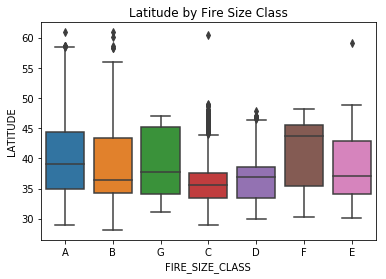

In [9]:
sns.boxplot(x = 'FIRE_SIZE_CLASS', y = 'LATITUDE', data = fires)
plt.title('Latitude by Fire Size Class')

Text(0.5, 1.0, 'Longitude by Fire Size Class')

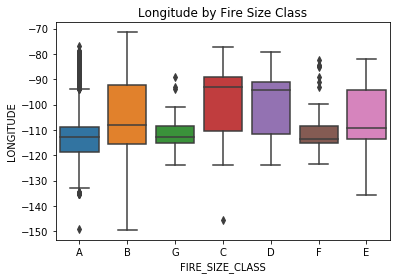

In [10]:
sns.boxplot(x = 'FIRE_SIZE_CLASS', y = 'LONGITUDE', data = fires)
plt.title('Longitude by Fire Size Class')

I want to look at how long each of the fires lasted. We can look at the average number of days the fire was active. We can also look at the length of fire by Fire Size Class

In [11]:
np.mean(fires['LENGTH_OF_FIRE'])

2.3464124435524334

The following graph tells us that F and G fires last a lot longer on average than the other fire classes. This makes sens that it would be harder to contain bigger fires.

Text(0.5, 1.0, 'Length of Fire by Fire Size Class')

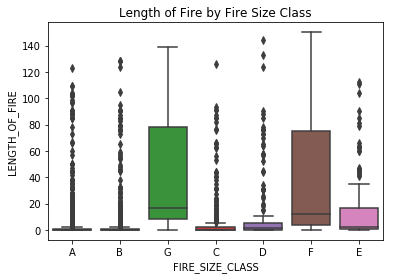

In [12]:
sns.boxplot(x = 'FIRE_SIZE_CLASS', y = 'LENGTH_OF_FIRE', data = fires)
plt.title('Length of Fire by Fire Size Class')

We can also find the average length of fire for each fire class:

In [13]:
fires.groupby(['FIRE_SIZE_CLASS'])['LENGTH_OF_FIRE'].mean()

FIRE_SIZE_CLASS
A     1.213185
B     1.849567
C     3.532391
D    12.482955
E    16.622642
F    34.916667
G    40.243243
Name: LENGTH_OF_FIRE, dtype: float64

We can similarly find the average length of fire for each state. This can help us see which states are doing well with their fire containment and which ones could improve. We can see that fires in North Dakota and Idaho last much longer than fires in other states.

In [14]:
fires.groupby(['STATE'])['LENGTH_OF_FIRE'].mean()

STATE
AK     0.512821
AL     0.243243
AR     0.910714
AZ     1.098026
CA     0.883893
CO     2.725686
FL     1.208861
GA     0.336957
ID    12.695839
IL     0.411765
IN     0.120000
KS     0.250000
KY     0.893082
LA     0.107914
MI     0.828947
MN     1.063063
MO     0.140401
MS     1.538462
MT     2.940054
NC     0.117647
ND    42.777778
NE     0.272727
NH     0.000000
NM     3.770115
NV     0.840708
OH     0.000000
OK     0.135922
OR     0.754115
PA     0.500000
SC     2.193548
SD     0.449704
TN     0.000000
TX     0.546667
UT     4.411111
VA     1.290323
WA     1.083333
WI     0.135593
WV     0.117647
WY     3.527919
Name: LENGTH_OF_FIRE, dtype: float64

We can plot the length of fire against the fire size to see if the fire size increases the length of fire

Text(0.5, 1.0, 'Length of Fire vs. Fire Size')

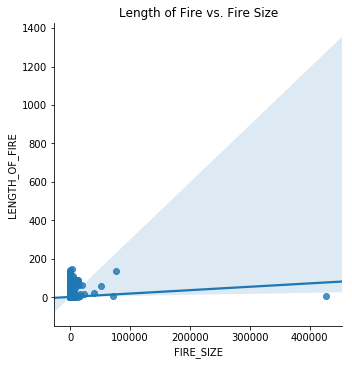

In [15]:
sns.lmplot('FIRE_SIZE', 'LENGTH_OF_FIRE', data = fires)
plt.title('Length of Fire vs. Fire Size')

There is a pretty obvious outier where there's a fire size above 400000 while the rest of the fires have sizes less than 100000. We can clean the data by droping that observation temporarily to look at the above graph again to try and get a little more interpretability out of it.

In [16]:
fires[fires['FIRE_SIZE'] > 300000]

,OBJECTID,FOD_ID,FPA_ID,SOURCE_SYSTEM_TYPE,SOURCE_SYSTEM,NWCG_REPORTING_AGENCY,NWCG_REPORTING_UNIT_ID,NWCG_REPORTING_UNIT_NAME,SOURCE_REPORTING_UNIT,SOURCE_REPORTING_UNIT_NAME,...,LATITUDE,LONGITUDE,OWNER_CODE,OWNER_DESCR,STATE,COUNTY,FIPS_CODE,FIPS_NAME,Shape,LENGTH_OF_FIRE
7412,7413,7449,FS-1433115,FED,FS-FIRESTAT,FS,USNMCIF,Cibola National Forest,0303,Cibola National Forest,...,35.216667,-100.933333,14.0,MISSING/NOT SPECIFIED,TX,179,179,Gray,"b""\x00\x01\xad\x10\x00\x00x'\xb8\xbb\xbb;Y\xc0...",7.0


In [17]:
fires_no_outlier = fires.drop([7412])

Text(0.5, 1.0, 'Length of Fire vs. Fire Size')

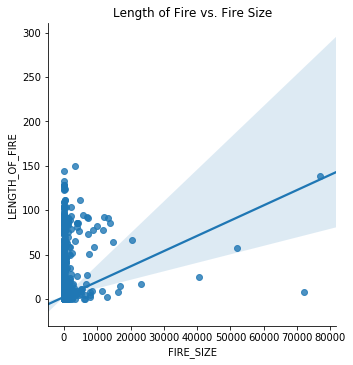

In [18]:
sns.lmplot('FIRE_SIZE', 'LENGTH_OF_FIRE', data = fires_no_outlier)
plt.title('Length of Fire vs. Fire Size')

This scatterplot more clearly indicates that there is a positive relationship between the length of the fire and the fire size. This makes intuitive sense because it implies that bigger fires could take longer to contain. We could create a model to determine if a larger fire does, in fact, increase the length of time to contain.